# AN√ÅLISIS DATASETS PRECIO VIVIENDA Y PRECIO VIVIENDA EN ALQUILER

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Para asegurarnos de que la ruta es la correcta:
%ls /content/drive/MyDrive/TFM/

'Clasificacion segunda residencia por nacionalidad.csv'
'DATASETS ADAPTADOS'@
'INCIDENCIA TELETRABAJO POR CCAA.csv'
'INCIDENCIA TELETRABAJO POR DEMOGRAFIA.csv'
'INCIDENCIA TELETRABAJO POR SOCIOECONOMIA.csv'
'INDICES MUNICIPIO SUP 10000 HABITANTES.csv'
 IPV_Anuario2025.csv
 IPVA_ponderaciones_nacionales_por_municipio.csv
 IPVA_ponderaciones_nacionales_por_provincia.csv
 IPVA_ponderaciones_nacionales_por_tamanÃÉo.csv
 IPVA_ponderaciones_nacionales_por_tipo_edificacion.csv
 IPVA_por_tamanÃÉo.csv
 IPVA_por_tipo_edificacion.csv
 IPVA_provinciales_por_tamanÃÉo.csv
 IPVA_provinciales_por_tipo_edificacion.csv
'IPV_Medias anuales.csv'
'IRAV 2024 2025.csv'
'MEDIA DIAS JORNADA EN TELETRABAJO POR CCAA.csv'
 MEDIADIASJORNADA_TELETRABAJO_CARACDEMO_CONVIVENCIA.csv
 MEDIADIASJORNADA_TELETRABAJO_CARACDEMO_EDAD.csv
 MEDIADIASJORNADA_TELETRABAJO_CARACDEMO_HABITANTES.csv
 MEDIADIASJORNADA_TELETRABAJO_CARACDEMO_SEXO.csv
 MEDIADIASJORNADA_TELETRABAJO_CARACDEMO_TAMANIODELHOGAR.csv
 MEDIADIASJORNADA_TELETRABA

In [4]:
# Especificamos la ruta hasta la carpeta donde tenemos los archivos
%cd /content/drive/MyDrive/TFM/

/content/drive/MyDrive/TFM


# 1. INDICES IPVA EN MUNICIPIOS SUPERIORES A 10.000 HABITANTES

In [5]:
df_1 = pd.read_csv('INDICES MUNICIPIO SUP 10000 HABITANTES.csv', sep=';')

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18048 entries, 0 to 18047
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Municipio     18048 non-null  object
 1   Tipo de dato  18048 non-null  object
 2   Periodo       18048 non-null  int64 
 3   Total         17998 non-null  object
dtypes: int64(1), object(3)
memory usage: 564.1+ KB


In [7]:
df_1.describe()

Periodo
count  18048.000000
mean    2016.500000
std        3.452148
min     2011.000000
25%     2013.750000
50%     2016.500000
75%     2019.250000
max     2022.000000

In [8]:
df_1

Municipio     Tipo de dato  Periodo    Total
0      Total Nacional           √çndice     2022  115,684
1      Total Nacional           √çndice     2021  112,694
2      Total Nacional           √çndice     2020  110,942
3      Total Nacional           √çndice     2019  109,999
4      Total Nacional           √çndice     2018  106,247
...               ...              ...      ...      ...
18043   52001 Melilla  Variaci√≥n anual     2015      0,5
18044   52001 Melilla  Variaci√≥n anual     2014        0
18045   52001 Melilla  Variaci√≥n anual     2013     -0,2
18046   52001 Melilla  Variaci√≥n anual     2012      3,9
18047   52001 Melilla  Variaci√≥n anual     2011       ..

[18048 rows x 4 columns]

In [9]:
# En este dataset tenemos datos de diversos a√±os. Vamos a quedarnos solo desde 2018 en adelante
# Cargar nuevamente el archivo con el separador correcto y permitiendo l√≠neas defectuosas
df_indices = pd.read_csv("INDICES MUNICIPIO SUP 10000 HABITANTES.csv", sep=';', on_bad_lines='skip')

# Filtrar los datos para quedarnos solo con los de 2018 en adelante
df_reducido = df_indices[df_indices['Periodo'] >= 2018].copy()

# Mostrar los datos filtrados
df_reducido


Municipio     Tipo de dato  Periodo    Total
0      Total Nacional           √çndice     2022  115,684
1      Total Nacional           √çndice     2021  112,694
2      Total Nacional           √çndice     2020  110,942
3      Total Nacional           √çndice     2019  109,999
4      Total Nacional           √çndice     2018  106,247
...               ...              ...      ...      ...
18036   52001 Melilla  Variaci√≥n anual     2022      1,1
18037   52001 Melilla  Variaci√≥n anual     2021      0,7
18038   52001 Melilla  Variaci√≥n anual     2020      0,7
18039   52001 Melilla  Variaci√≥n anual     2019      1,1
18040   52001 Melilla  Variaci√≥n anual     2018      1,3

[7520 rows x 4 columns]

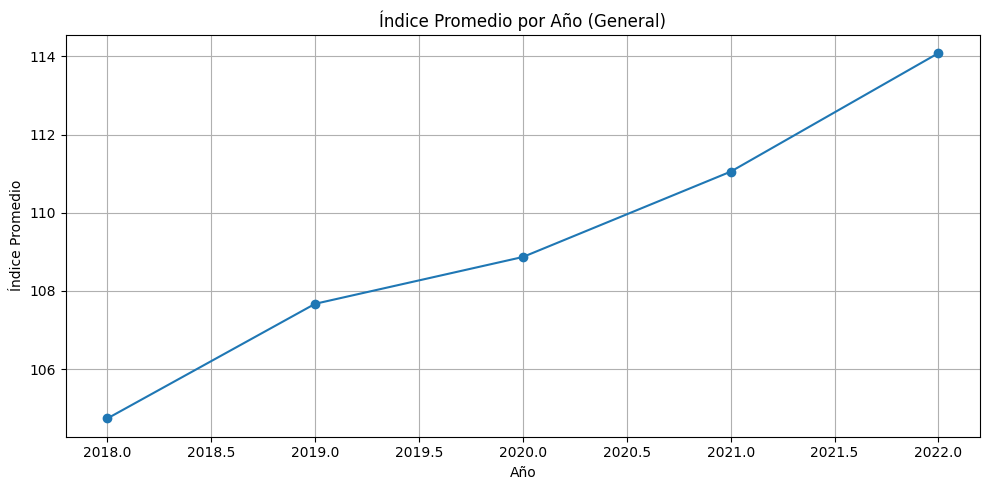

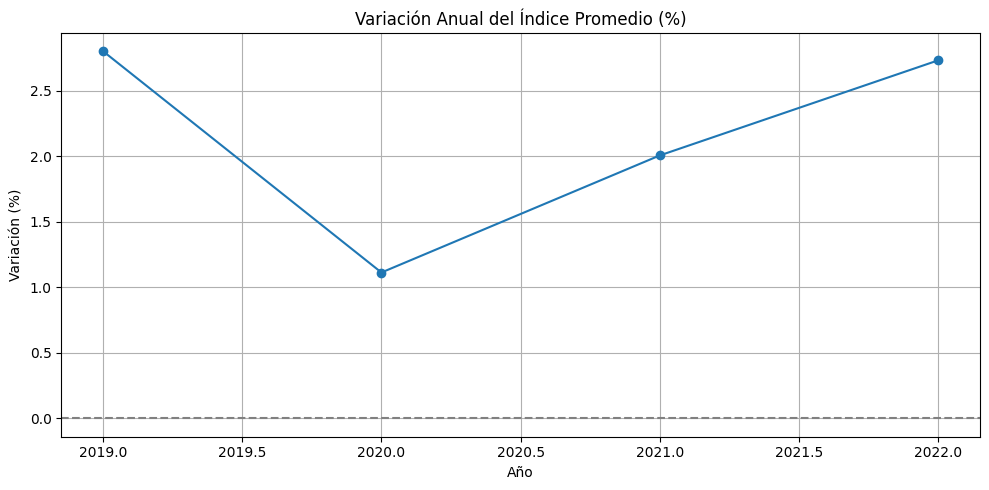

In [11]:
# Agrupar por a√±o y calcular la media del √≠ndice
# Filter for '√çndice' and convert 'Total' to numeric
df_reducido_cleaned = df_reducido[df_reducido['Tipo de dato'] == '√çndice'].copy()
df_reducido_cleaned['Total'] = df_reducido_cleaned['Total'].astype(str).str.replace(',', '.', regex=False)
df_reducido_cleaned['Total'] = pd.to_numeric(df_reducido_cleaned['Total'], errors='coerce').fillna(0)


df_general = df_reducido_cleaned.groupby('Periodo', as_index=False).agg({'Total': 'mean'})
df_general['Variaci√≥n anual (%)'] = df_general['Total'].pct_change() * 100

# Gr√°fico 1: L√≠nea del √≠ndice promedio por a√±o
plt.figure(figsize=(10, 5))
plt.plot(df_general['Periodo'], df_general['Total'], marker='o')
plt.title('√çndice Promedio por A√±o (General)')
plt.xlabel('A√±o')
plt.ylabel('√çndice Promedio')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gr√°fico 2: L√≠nea de variaci√≥n anual promedio
plt.figure(figsize=(10, 5))
plt.plot(df_general['Periodo'], df_general['Variaci√≥n anual (%)'], marker='o')
plt.title('Variaci√≥n Anual del √çndice Promedio (%)')
plt.xlabel('A√±o')
plt.ylabel('Variaci√≥n (%)')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

Los gr√°ficos muestran la los √≠ndices de precio de alquiler, esto es, la evoluci√≥n anual de los precios de la vivienda alquilada como residencia habitual de los hogares. La fuente de informaci√≥n utilizada para su c√°lculo es la base de datos proporcionada por la AEAT, que procede del modelo 100 de las declaraciones del IRPF.  

In [12]:
# Eliminamos el c√≥digo postal (n√∫mero inicial) directamente de la columna 'Municipio'
df_reducido_cleaned['Municipio'] = df_reducido_cleaned['Municipio'].str.replace(r'^\d{5}\s+', '', regex=True)
print(df_reducido_cleaned['Municipio'])


0        Total Nacional
1        Total Nacional
2        Total Nacional
3        Total Nacional
4        Total Nacional
              ...      
18024           Melilla
18025           Melilla
18026           Melilla
18027           Melilla
18028           Melilla
Name: Municipio, Length: 3760, dtype: object


In [13]:
# Vamos a ver el top 5 municipios con el √≠ndice de precio de vivienda en alquiler m√°s alto y m√°s bajo
# Agrupar por municipio y calcular el promedio del √≠ndice total desde 2018
df_2022 = df_reducido_cleaned[df_reducido_cleaned['Periodo'] == 2022].copy()
df_2022['Total'] = df_2022['Total'].astype(float)

# Calculamos el promedio
promedio_por_municipio = df_2022.groupby('Municipio', as_index=False).agg({'Total': 'mean'})

# Top 5 con √≠ndice m√°s alto
top_5_altos = promedio_por_municipio.sort_values(by='Total', ascending=False).head(5)

# Top 5 con √≠ndice m√°s bajo
top_5_bajos = promedio_por_municipio.sort_values(by='Total', ascending=True).head(5)

# Mostrar resultados
print("Top 5 municipios con √≠ndice m√°s alto:")
print(top_5_altos)

print("\nTop 5 municipios con √≠ndice m√°s bajo:")
print(top_5_bajos)

Top 5 municipios con √≠ndice m√°s alto:
              Municipio    Total
413               Oca√±a  129.659
41   Alhaur√≠n el Grande  129.496
309               J√≥dar  128.232
539  Riba-roja de T√∫ria  127.034
14                Albox  126.892

Top 5 municipios con √≠ndice m√°s bajo:
                Municipio    Total
114                 Berja   92.833
722           Villamart√≠n   99.712
440  Palos de la Frontera   99.782
160            Cantillana  100.592
438         Palma del R√≠o  100.883


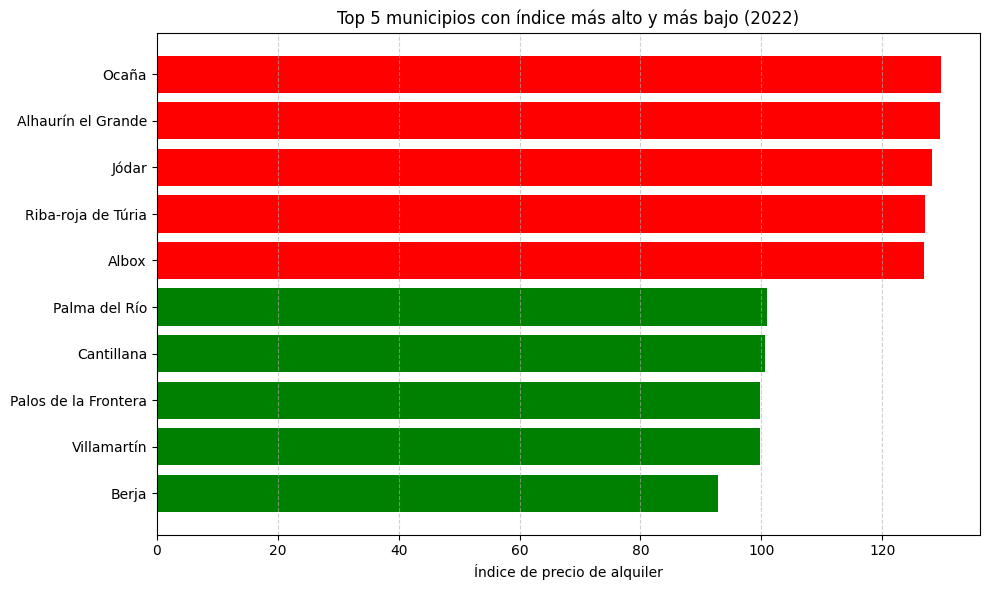

In [14]:
# Graficamos para mejor visualizaci√≥n

# Concatenar para graficar juntos
top_10 = pd.concat([top_5_altos, top_5_bajos])
top_10 = top_10.sort_values(by ='Total', ascending=True)



# Establecemos los colores para facilitar la distinci√≥n
colors = ['green' if municipio in top_5_bajos['Municipio'].values else 'red' for municipio in top_10['Municipio']]

# Crear nuevamente el gr√°fico solo con matplotlib sin herramientas auxiliares
plt.figure(figsize = (10, 6))
plt.barh(top_10['Municipio'], top_10['Total'], color = colors)
plt.xlabel('√çndice de precio de alquiler')
plt.title('Top 5 municipios con √≠ndice m√°s alto y m√°s bajo (2022)')
plt.grid(axis ='x', linestyle ='--', alpha = 0.6)
plt.tight_layout()
plt.show()



# 2. IPVA PONDERACIONES ANUALES POR MUNICIPIO

In [15]:
df2 = pd.read_csv("IRAV 2024 2025.csv", sep=';')

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo de dato  5 non-null      object
 1   Periodo       5 non-null      object
 2   Total         5 non-null      object
dtypes: object(3)
memory usage: 252.0+ bytes


In [17]:
df2.describe()

Tipo de dato  Periodo Total
count                 5        5     5
unique                1        5     5
top     Variaci√≥n anual  2025M03  1,98
freq                  5        1     1

In [18]:
df2

Tipo de dato  Periodo Total
0  Variaci√≥n anual  2025M03  1,98
1  Variaci√≥n anual  2025M02  2,08
2  Variaci√≥n anual  2025M01  2,19
3  Variaci√≥n anual  2024M12  2,28
4  Variaci√≥n anual  2024M11   2,2

# 3. PRECIO TASADO VIVIENDA LIBRE T4 2024 POR MUNICIPIO Y PROVINCIA

Vamos a analizar los datos que m√°s nos interesan con relaci√≥n al precio de vivienda. Se trata de un dataset que hemos configurado a partir de informaci√≥n obtenida del INE con los datos de precios de vivienda de muchos a√±os, qued√°ndonos con los datos de 2018 a 2024, comparando √∫nicamente el 4¬∫ trimestre.


El motivo de elegir s√≥lo un trimestre es facilitar la comparativa. Asimismo, hemos escogido los a√±os 2018 y 2019 para tener datos anteriores a la pandemia Codvid-2019, ya que es previsible que haya variaciones desde ese momento.

In [19]:
df3 = pd.read_csv("Precio tasado vivienda libre 2018-2024 T4.csv", sep=';')

In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   A√±o                                 2098 non-null   int64 
 1   Provincia                           2098 non-null   object
 2   Municipio                           2098 non-null   object
 3   Hasta cinco a√±os de antiguedad      779 non-null    object
 4   Con m√°s de cinco a√±os de antigedad  2097 non-null   object
 5   Total                               2098 non-null   object
dtypes: int64(1), object(5)
memory usage: 98.5+ KB


In [21]:
# Vamos a pasar los object a num√©ricos en las columnas num√©ricas
columnas_a_convertir = [
    'Hasta cinco a√±os de antiguedad',
    'Con m√°s de cinco a√±os de antigedad',
    'Total'
]

# Reemplazamos comas por puntos, eliminando separadores de miles y convertimos a float
for col in columnas_a_convertir:
    df3[col] = (
        df3[col].astype(str)
                .str.replace(r'\.', '', regex=True)      # elimina puntos (separador de miles)
                .str.replace(',', '.', regex=False)      # cambia la coma decimal por punto
                .replace('nan', None)                    # evitar errores con texto 'nan'
                .astype(float)
    )

In [22]:
df3.describe()

A√±o  Hasta cinco a√±os de antiguedad  \
count  2098.000000                      779.000000   
mean   2021.052431                     2243.154172   
std       1.986631                      812.784422   
min    2018.000000                      886.300000   
25%    2019.000000                     1655.850000   
50%    2021.000000                     2068.000000   
75%    2023.000000                     2642.200000   
max    2024.000000                     5737.200000   

       Con m√°s de cinco a√±os de antigedad        Total  
count                         2097.000000  2098.000000  
mean                          1558.336862  1563.318589  
std                            728.093619   730.696938  
min                            548.500000   550.200000  
25%                           1018.600000  1020.725000  
50%                           1377.000000  1383.200000  
75%                           1955.900000  1964.125000  
max                           5830.200000  5825.700000

Tenemos nulos en dos columnas, particularmente en la columna de hasta 5 a√±os de antig√ºedad. Sin embargo, para este estudio no nos importa la antig√ºedad de la vivienda, sino el valor general de la vivienda por pronvicia y municipio. Es por esto que no vamos a tratar estos nulos y nos centramos en la columna "total" que no contiene nulos.

In [23]:
df3

A√±o Provincia        Municipio  Hasta cinco a√±os de antiguedad  \
0     2024   Almer√≠a          Almer√≠a                          2068.2   
1     2024   Almer√≠a            Nijar                             NaN   
2     2024   Almer√≠a  Roquetas de Mar                             NaN   
3     2024   Almer√≠a       Ejido (El)                          1529.4   
4     2024     C√°diz        Algeciras                             NaN   
...    ...       ...              ...                             ...   
2093  2018   Bizkaia        Santurtzi                             NaN   
2094  2018   Bizkaia           Sestao                             NaN   
2095  2018  La Rioja          Logro√±o                             NaN   
2096  2018     Ceuta            Ceuta                             NaN   
2097  2018   Melilla          Melilla                             NaN   

      Con m√°s de cinco a√±os de antigedad   Total  
0                                 1466.1  1489.6  
1                                 1193.3  1199.1  
2                                 1433.5  1433.3  
3                                 1072.6  1081.6  
4                                 1251.5  1252.4  
...                                  ...     ...  
2093                              2030.2  2034.5  
2094                              1615.8  1617.0  
2095                              1151.9  1156.3  
2096                              1693.3  1701.8  
2097                              1613.5  1649.1  

[2098 rows x 6 columns]

In [24]:
# Asegurarse de que 'Total' es float
df3['Total'] = df3['Total'].astype(float)

# Vamos a crear listas para almacenar los resultados por a√±o
top_altos_por_a√±o = []
top_bajos_por_a√±o = []

# Para obtener los resultados por a√±o, vamos a iterar por cada a√±o √∫nico
for a√±o in sorted(df3['A√±o'].unique()):
    # Filtrar el DataFrame para el a√±o actual
    df_a√±o = df3[df3['A√±o'] == a√±o].copy()

    # Agrupamos por municipio y calculamos el promedio, en el caso de que haya m√°s de un dato por municipio
    promedio_por_municipio = df_a√±o.groupby('Municipio', as_index=False)['Total'].mean()

    # Top 5 m√°s altos
    top_5_altos = promedio_por_municipio.sort_values(by='Total', ascending=False).head(5)
    top_5_altos['A√±o'] = a√±o
    top_altos_por_a√±o.append(top_5_altos)

    # Top 5 m√°s bajos
    top_5_bajos = promedio_por_municipio.sort_values(by='Total', ascending=True).head(5)
    top_5_bajos['A√±o'] = a√±o
    top_bajos_por_a√±o.append(top_5_bajos)

# Unimos los resultados en dos dataframes
df_top_altos = pd.concat(top_altos_por_a√±o, ignore_index = True)
df_top_bajos = pd.concat(top_bajos_por_a√±o, ignore_index = True)

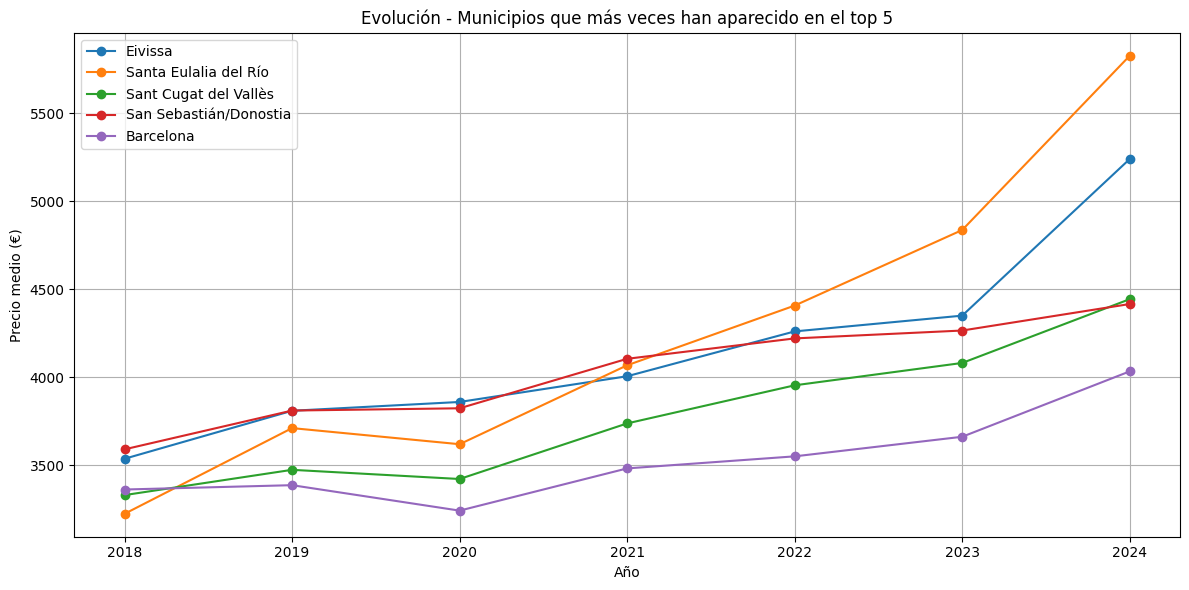

In [25]:
# Vamos a mostrar los municipios que m√°s veces aparecen en el top 5 desde 2018, mostrando su evoluci√≥n desde 2018 hasta 2024
# Contar apariciones en el top
conteo = df_top_altos['Municipio'].value_counts().head(5).index.tolist()

# Filtrar y graficar esos
df_evolucion_frecuentes = df3[df3['Municipio'].isin(conteo)].groupby(['A√±o', 'Municipio'])['Total'].mean().reset_index()

plt.figure(figsize=(12, 6))
for municipio in conteo:
    datos = df_evolucion_frecuentes[df_evolucion_frecuentes['Municipio'] == municipio]
    plt.plot(datos['A√±o'], datos['Total'], marker='o', label=municipio)

plt.title('Evoluci√≥n - Municipios que m√°s veces han aparecido en el top 5')
plt.xlabel('A√±o')
plt.ylabel('Precio medio (‚Ç¨)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

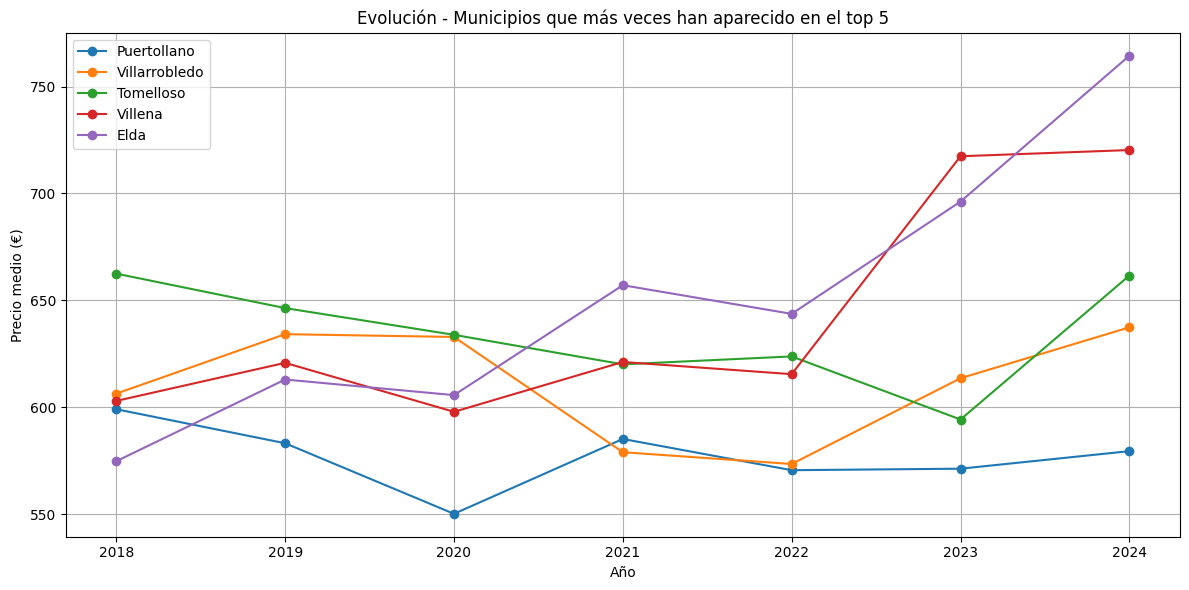

In [26]:
# Vamos a mostrar los municipios que m√°s veces aparecen en el top 5 desde 2018, mostrando su evoluci√≥n desde 2018 hasta 2024
# Contar apariciones en el top
conteo = df_top_bajos['Municipio'].value_counts().head(5).index.tolist()

# Filtrar y graficar esos
df_evolucion_frecuentes = df3[df3['Municipio'].isin(conteo)].groupby(['A√±o', 'Municipio'])['Total'].mean().reset_index()

plt.figure(figsize=(12, 6))
for municipio in conteo:
    datos = df_evolucion_frecuentes[df_evolucion_frecuentes['Municipio'] == municipio]
    plt.plot(datos['A√±o'], datos['Total'], marker='o', label=municipio)

plt.title('Evoluci√≥n - Municipios que m√°s veces han aparecido en el top 5')
plt.xlabel('A√±o')
plt.ylabel('Precio medio (‚Ç¨)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Estos valores representan euros por metro cuadrado.


/tmp/ipython-input-27-696293801.py:16: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


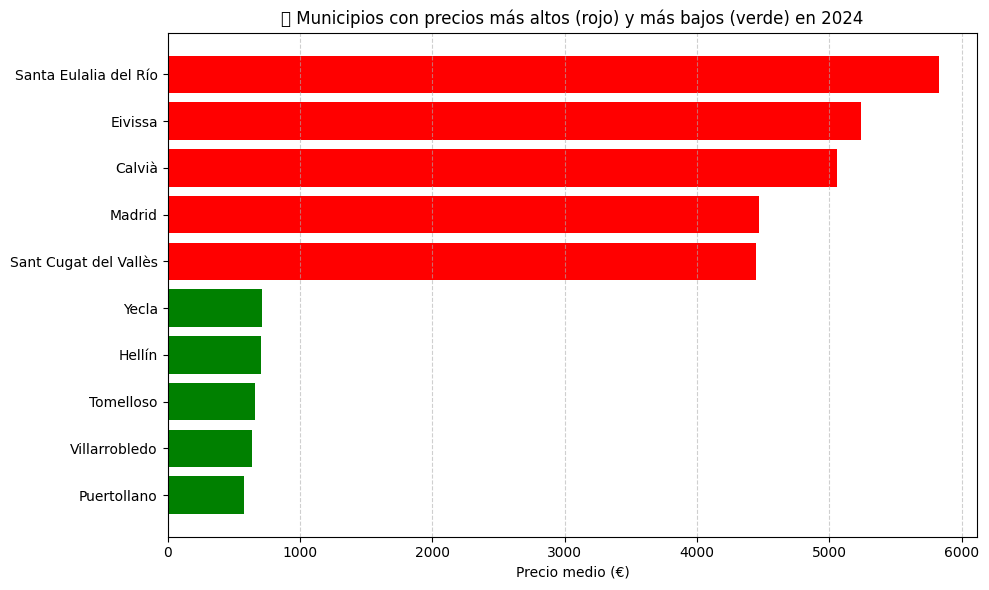

In [27]:
# Filtrar top altos y bajos del a√±o 2024
df_2024_altos = df_top_altos[df_top_altos['A√±o'] == 2024]
df_2024_bajos = df_top_bajos[df_top_bajos['A√±o'] == 2024]

# Unir y asignar color
df_2024 = pd.concat([df_2024_altos, df_2024_bajos])
df_2024['Color'] = df_2024['Municipio'].isin(df_2024_altos['Municipio']).map({True: 'red', False: 'green'})
df_2024 = df_2024.sort_values(by='Total', ascending=True)

# Gr√°fico
plt.figure(figsize=(10, 6))
plt.barh(df_2024['Municipio'], df_2024['Total'], color=df_2024['Color'])
plt.xlabel('Precio medio (‚Ç¨)')
plt.title('üèôÔ∏è Municipios con precios m√°s altos (rojo) y m√°s bajos (verde) en 2024')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

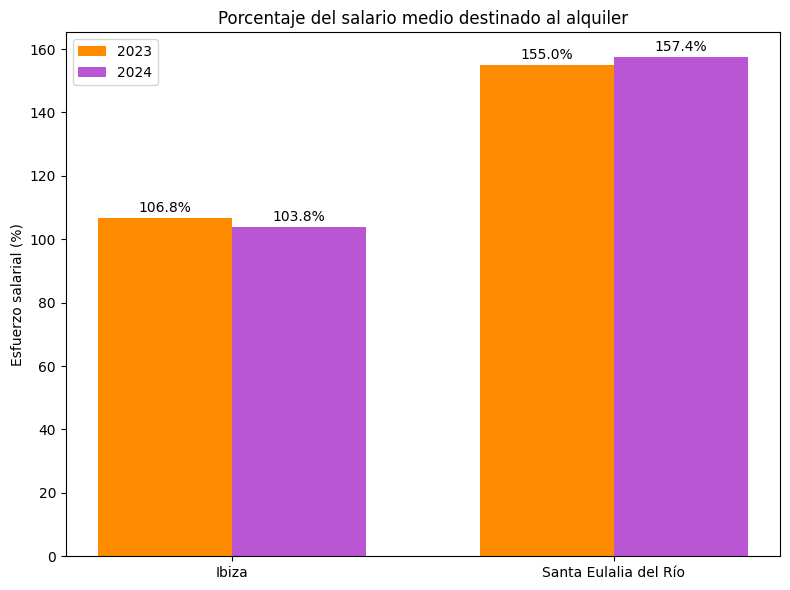

In [28]:
# Reimportamos bibliotecas y volvemos a generar el gr√°fico tras el reinicio del entorno
import matplotlib.pyplot as plt

# Datos de esfuerzo salarial
municipios = ['Ibiza', 'Santa Eulalia del R√≠o']
salario_mensual_2023 = 2337.5  # Aprox. 28.050 ‚Ç¨/a√±o
salario_mensual_2024 = 2490    # Aprox. 29.880 ‚Ç¨/a√±o

alquiler_2023 = [2496, 3623]  # Estimados con reducci√≥n de ~3.5% y 8.2% sobre los valores de 2024
alquiler_2024 = [2584, 3919]

# C√°lculo del esfuerzo salarial como porcentaje
esfuerzo_2023 = [(a / salario_mensual_2023) * 100 for a in alquiler_2023]
esfuerzo_2024 = [(a / salario_mensual_2024) * 100 for a in alquiler_2024]

# Gr√°fico
x = range(len(municipios))
width = 0.35

colors = ['darkorange', 'mediumorchid']  # 2023 = naranja, 2024 = violeta

plt.figure(figsize=(8,6))
bars_2023 = plt.bar([i - width/2 for i in x], esfuerzo_2023, width, label='2023', color=colors[0])
bars_2024 = plt.bar([i + width/2 for i in x], esfuerzo_2024, width, label='2024', color=colors[1])

plt.xticks(x, municipios)
plt.ylabel('Esfuerzo salarial (%)')
plt.title('Porcentaje del salario medio destinado al alquiler')
plt.legend()
for bar in bars_2023 + bars_2024:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# 4. SEGUNDAS RESIDENCIAS DE LOS HOGARES

Datos municipales (municipios de m√°s de 50.000 habitantes y capitales de provincia)

In [29]:
df_4 = pd.read_csv('Clasificacion segunda residencia por nacionalidad.csv', sep=';')

In [30]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Municipio                           151 non-null    object 
 1   Con segunda residencia total        151 non-null    float64
 2   Con segunda residencia nacionales   151 non-null    float64
 3   Con segunda residencia extranjeros  151 non-null    object 
 4   Residencia habitual total           151 non-null    float64
 5   Residencia habitual nacionales      151 non-null    float64
 6   Residencia habitual extranjeros     151 non-null    float64
 7   Total                               151 non-null    object 
 8   Total nacionales                    151 non-null    object 
 9   Total extranjeros                   151 non-null    float64
dtypes: float64(6), object(4)
memory usage: 11.9+ KB


In [31]:
# Veos que tenemos columnas con valor object, por lo que tenemos que pasarlas a num√©ricas
for col in df_4.columns[1:]:
    df_4[col] = df_4[col].replace({r'\.': ''}, regex=True)
    df_4[col] = pd.to_numeric(df_4[col], errors='coerce')

In [32]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Municipio                           151 non-null    object 
 1   Con segunda residencia total        151 non-null    float64
 2   Con segunda residencia nacionales   151 non-null    float64
 3   Con segunda residencia extranjeros  27 non-null     float64
 4   Residencia habitual total           151 non-null    float64
 5   Residencia habitual nacionales      151 non-null    float64
 6   Residencia habitual extranjeros     151 non-null    float64
 7   Total                               151 non-null    int64  
 8   Total nacionales                    151 non-null    int64  
 9   Total extranjeros                   151 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 11.9+ KB


In [33]:
df_4.describe()

Con segunda residencia total  Con segunda residencia nacionales  \
count                    151.000000                         151.000000   
mean                      11.876722                          15.769695   
std                       28.991372                          61.283889   
min                        1.002000                           1.144000   
25%                        3.176500                           2.980500   
50%                        5.465000                           5.263000   
75%                       11.473000                          11.145000   
max                      321.468000                         687.000000   

       Con segunda residencia extranjeros  Residencia habitual total  \
count                           27.000000                 151.000000   
mean                          1051.666667                  53.917013   
std                           2199.292421                  91.885952   
min                            153.000000                  10.718000   
25%                            299.500000                  23.301000   
50%                            473.000000                  29.581000   
75%                            779.000000                  53.802000   
max                          11774.000000                 962.242000   

       Residencia habitual nacionales  Residencia habitual extranjeros  \
count                      151.000000                       151.000000   
mean                        44.717775                       140.330318   
std                         72.061890                       288.650749   
min                          9.407000                         1.004000   
25%                         18.653000                         1.927500   
50%                         24.846000                         3.859000   
75%                         47.338000                        13.057500   
max                        762.095000                       994.000000   

              Total  Total nacionales  Total extranjeros  
count  1.510000e+02      1.510000e+02         151.000000  
mean   6.579374e+04      5.594237e+04         126.937510  
std    1.203820e+05      9.868215e+04         275.817709  
min    1.466900e+04      1.112500e+04           1.009000  
25%    2.658350e+04      2.159600e+04           1.895500  
50%    3.452100e+04      3.046300e+04           3.932000  
75%    6.854450e+04      6.056750e+04          13.435500  
max    1.283710e+06      1.062201e+06         994.000000

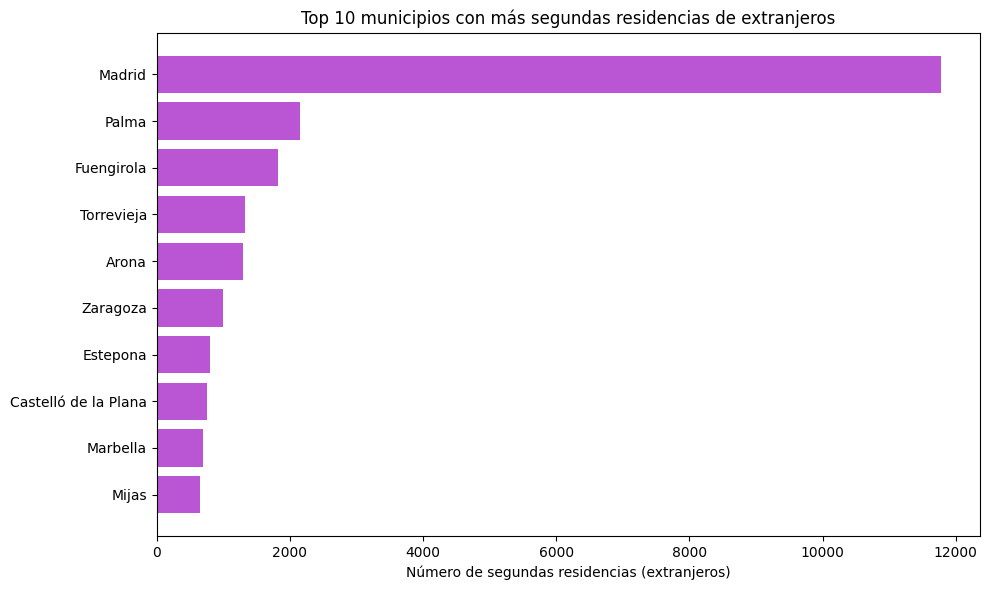

In [34]:
# Calculamos el top 10 de municipios con m√°s segundas residencias de extranjeros
top_10_sr_extranjeros = df_4.nlargest(10, "Con segunda residencia extranjeros")[["Municipio", "Con segunda residencia extranjeros"]]

# Gr√°fico de barras
plt.figure(figsize=(10, 6))
plt.barh(top_10_sr_extranjeros["Municipio"], top_10_sr_extranjeros["Con segunda residencia extranjeros"], color="mediumorchid")
plt.xlabel("N√∫mero de segundas residencias (extranjeros)")
plt.title("Top 10 municipios con m√°s segundas residencias de extranjeros")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Liderazgo absoluto de Madrid
Madrid concentra m√°s de 11.700 segundas residencias de extranjeros, muy por encima del resto.

Esto podr√≠a indicar inversi√≥n extranjera con fines no vacacionales, como negocios, movilidad internacional o residencia de larga duraci√≥n sin cambio de empadronamiento.

Foco vacacional: Palma, Fuengirola, Torrevieja, Arona.
El resto del top 10 incluye destinos tur√≠sticos mediterr√°neos y canarios, reflejando claramente un patr√≥n de residencia estacional o tur√≠stica.

Municipios como Marbella, Mijas o Castell√≥ de la Plana siguen figurando como referentes del atractivo inmobiliario para extranjeros.



In [35]:
df_4['Con segunda residencia nacionales'].describe()

count    151.000000
mean      15.769695
std       61.283889
min        1.144000
25%        2.980500
50%        5.263000
75%       11.145000
max      687.000000
Name: Con segunda residencia nacionales, dtype: float64

In [36]:
madrid_segunda_nacionales = df_4[df_4["Municipio"].str.upper() == "MADRID"]["Con segunda residencia nacionales"].values
madrid_segunda_extranjeros = df_4[df_4["Municipio"].str.upper() == "MADRID"]["Con segunda residencia extranjeros"].values
print(madrid_segunda_nacionales)
print(madrid_segunda_extranjeros)

[300.106]
[11774.]


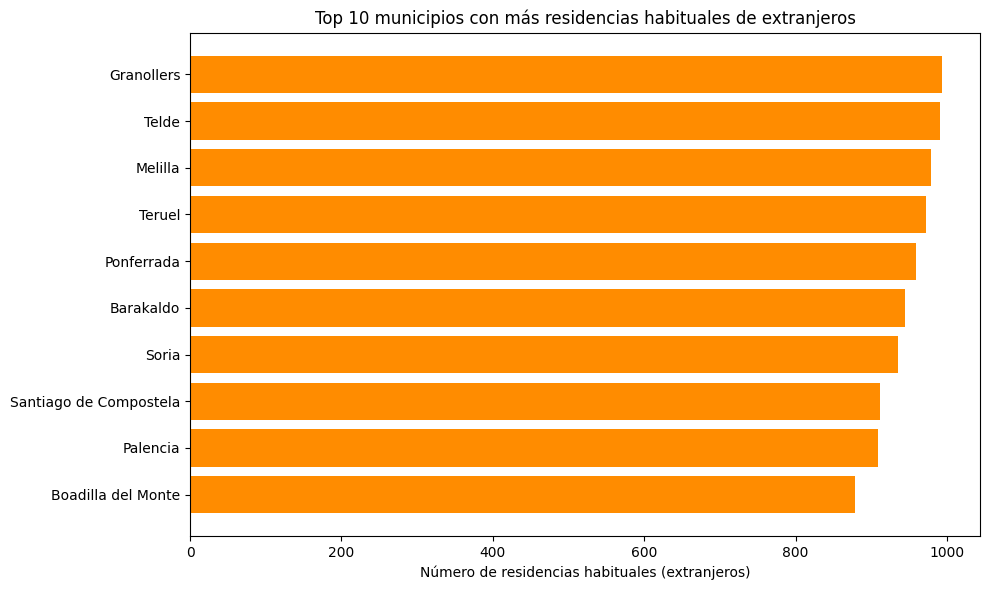

In [37]:
# Extraemos el top 10 municipios con m√°s residencias habituales de extranjeros
top_10_habitual_extranjeros = df_4[["Municipio", "Residencia habitual extranjeros"]].sort_values(
    by="Residencia habitual extranjeros", ascending=False).head(10)

# Gr√°fico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(top_10_habitual_extranjeros["Municipio"], top_10_habitual_extranjeros["Residencia habitual extranjeros"], color="darkorange")
plt.xlabel("N√∫mero de residencias habituales (extranjeros)")
plt.title("Top 10 municipios con m√°s residencias habituales de extranjeros")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


A diferencia del gr√°fico de segundas residencias, este ranking est√° liderado por municipios no tur√≠sticos ni costeros: Granollers, Telde, Melilla o Teruel.

Se trata en su mayor√≠a de localidades medianas o del interior, lo que indica presencia de poblaci√≥n extranjera con arraigo permanente (trabajo, familia o residencia principal).

Estos patrones sugieren una distribuci√≥n de extranjeros m√°s diversa cuando se trata de vivienda habitual, frente al sesgo tur√≠stico de las segundas residencias.